Importing Libraries

In [39]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

Data Import

In [40]:
wholesale_data = pd.read_csv('Wholesale_Data.csv')
wholesale_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## Part 1 : EDA and Pre-processing


-   Data Cleaning: Checking nulls, shape and missing values. 


In [41]:
#cheking dtypes
wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [42]:
#checking null values
wholesale_data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [43]:
wholesale_data.duplicated().sum()

0

- Descriptive Statistics to understand the distribution of data

In [44]:
#descriptive statistics
wholesale_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


- Visual EDA

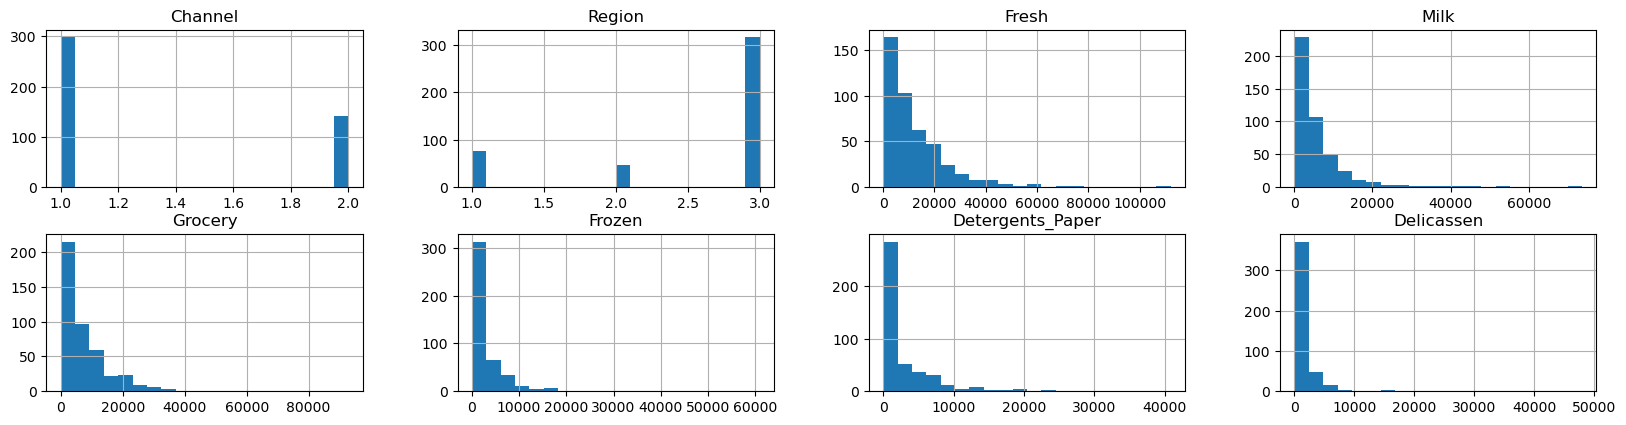

In [45]:
#checking the distrubution of all variables using a histograms
wholesale_data.hist(bins=20, figsize=(20,10), layout= (4,4))
plt.show()

All numerical variables are skewed towards the right. We will be standardizing data ahead as k-means is sensitive to outliers. 

Outlier Dectection & Handling

<Axes: >

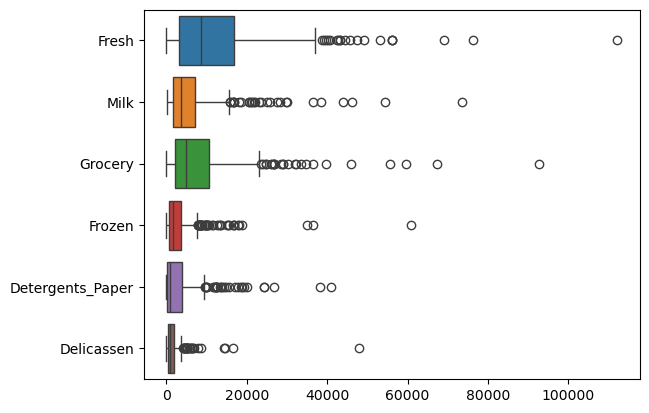

In [46]:
#separating numerical columns from categorical columns for a box-plot
num_columns = wholesale_data.iloc[::,2:]
sns.boxplot( data=num_columns, orient = "h")

In [47]:

# Function to remove outliers
def remove_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [48]:
# Applying the function on each numerical column
for col in num_columns.columns:
    cleaned_data = remove_outliers(wholesale_data, col)
    wholesale_data = wholesale_data[wholesale_data[col].isin(cleaned_data[col])]

# View the DataFrame after removing outliers
pd.DataFrame(wholesale_data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


<Axes: >

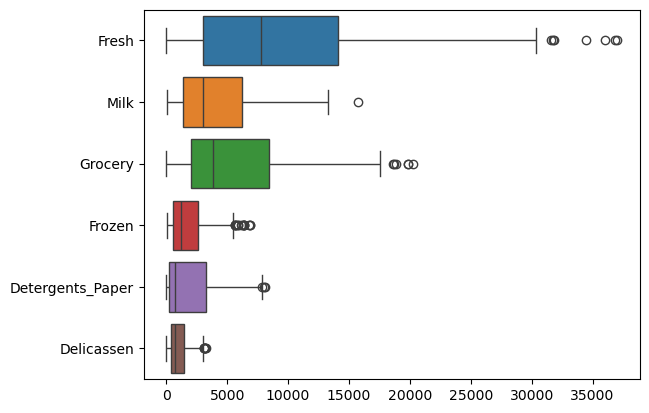

In [49]:
sns.boxplot( data=cleaned_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper',	'Delicassen']], orient = "h")

In multivariate data, an outlier in one dimension might not be an outlier in another, making it difficult to remove all outliers comprehensively. We must also be cautious of removing all outliers so not to loose the character of data. Furthermore, when we standardize data, we will be able to address outliers further. 

- Checking Correlations between all variables

In [50]:
wholesale_corr = wholesale_data.corr()
wholesale_corr

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.145904,-0.083583,0.616291,0.708853,-0.180617,0.772343,0.202762
Region,0.145904,1.000000,-0.006608,0.099850,0.102724,-0.075077,0.099916,0.092540
Fresh,-0.083583,-0.006608,1.000000,-0.056104,-0.064819,0.200101,-0.202086,0.211049
Milk,0.616291,0.099850,-0.056104,1.000000,0.736872,-0.165518,0.685531,0.290687
Grocery,0.708853,0.102724,-0.064819,0.736872,1.000000,-0.201720,0.845943,0.272322
Frozen,-0.180617,-0.075077,0.200101,-0.165518,-0.201720,1.000000,-0.185918,0.075176
Detergents_Paper,0.772343,0.099916,-0.202086,0.685531,0.845943,-0.185918,1.000000,0.163153
Delicassen,0.202762,0.092540,0.211049,0.290687,0.272322,0.075176,0.163153,1.000000


The correlation between Grocery and Detergent Paper seems to be the strongest at 0.85, followed by Channel and Detergents_Paper at 0.77, and then Channel and Milk at 0.74.

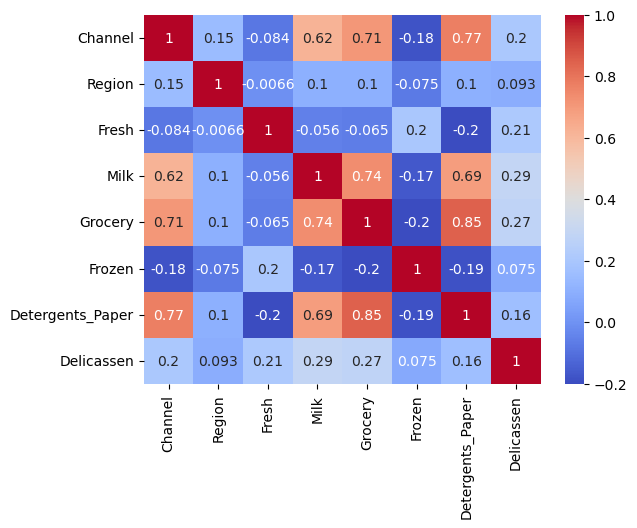

In [51]:
sns.heatmap(wholesale_corr, annot=True, cmap='coolwarm')
plt.show()

- Data Transformation

In [52]:
import numpy as np

# Applying log transformation to the numerical columns

wholesale_data[num_columns.columns] = np.log(num_columns + 1)

In [53]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Applying StandardScaler to the numerical columns
wholesale_data[num_columns.columns]= scaler.fit_transform(wholesale_data[num_columns.columns])

## K-Means Clustering

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(wholesale_data[num_columns.columns])
    wcss.append(kmeans.inertia_)

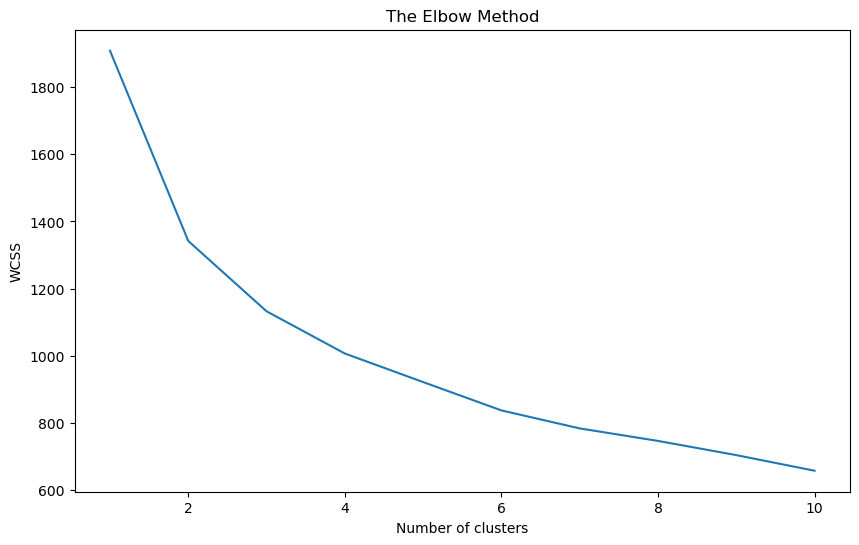

In [55]:
    # Plotting the results onto a line graph to observe the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The "elbow" appears to be not very pronounced, but we can infer a point where the rate of decrease changes. It seems like the curve starts to flatten out after the number of clusters increases beyond 2. However, the curve doesn't have a clear angle that would indicate a strong "elbow." In such cases, the decision might not be clear-cut, and it could be beneficial to consider additional methods or domain knowledge to decide.

Given that the slope of the line changes more noticeably after 2, it might be reasonable to consider 2 as potential elbow point.

In [57]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(wholesale_data[num_columns.columns])
labels = kmeans.labels_

# Adding the cluster labels to the DataFrame
wholesale_data['Cluster'] = clusters
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,0.603895,1.312173,0.693679,-1.472448,0.831770,0.646546,0
1,2,3,0.167258,1.328450,0.923210,0.413466,0.960274,0.890810,0
3,1,3,0.638200,-0.835795,0.125369,1.569735,-0.193793,0.896619,1
5,2,3,0.382217,1.151417,0.314743,-0.457712,0.585824,0.716475,0
6,2,3,0.571205,0.175845,0.615028,-0.750729,0.930912,-0.127716,0


In [58]:
from sklearn.metrics import silhouette_score

# Calculating the Silhouette Score
score = silhouette_score(wholesale_data, clusters)
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.286


Since K-means works in multi-dimensional space and scatter plots are 2D, we can use PCA to reduce the dimensions to two principal components and plot accordingly.

In [59]:
from sklearn.decomposition import PCA

#Applying PCA to Reduce to Two Dimensions
pca = PCA(n_components=2, random_state=42)
wholesale_data_pca = pca.fit_transform(wholesale_data[num_columns.columns])

In [60]:
#Applying K-means Clustering to the PCA-Reduced Data
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(wholesale_data_pca)

In [61]:
# Now call the plot_clusters function with the PCA-reduced data and the K-means cluster labels
pca_df = pd.DataFrame(data=wholesale_data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

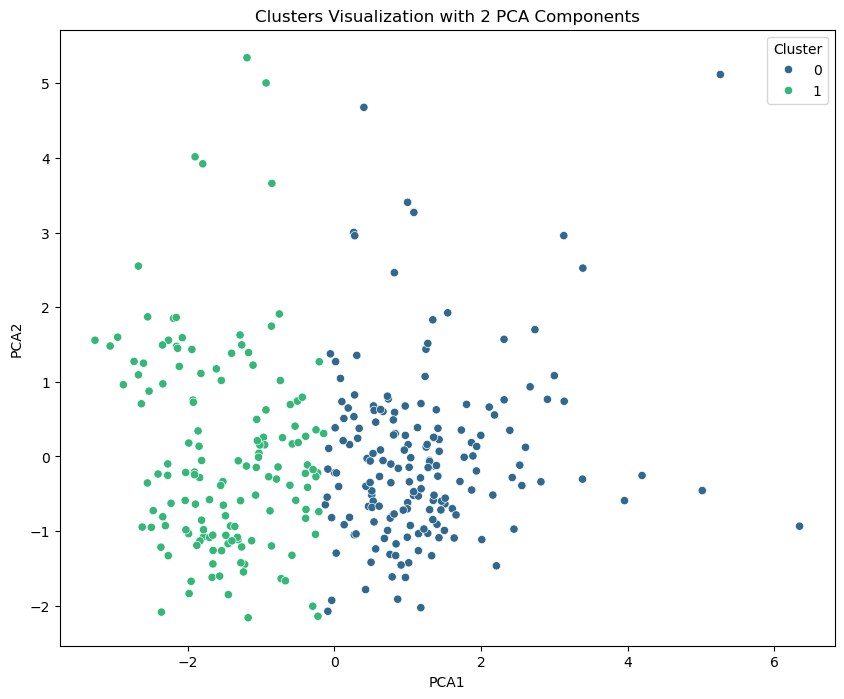

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clusters Visualization with 2 PCA Components')
plt.show()

## Heirarchical Clustering

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(wholesale_data, 'ward')


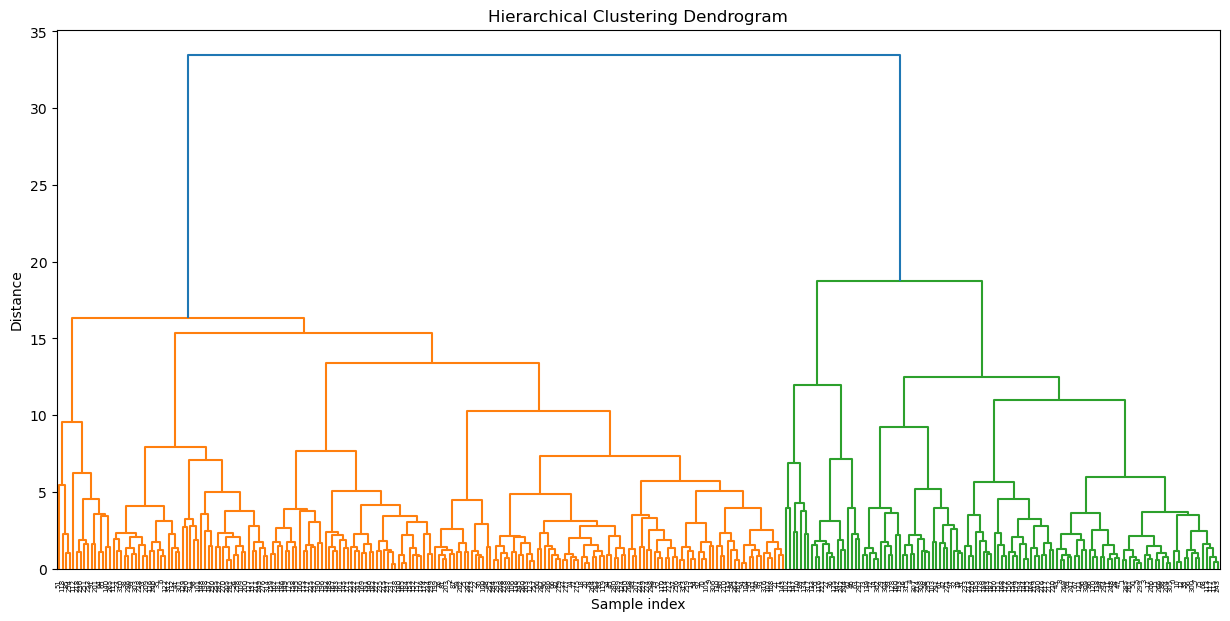

In [64]:
# Plotting the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

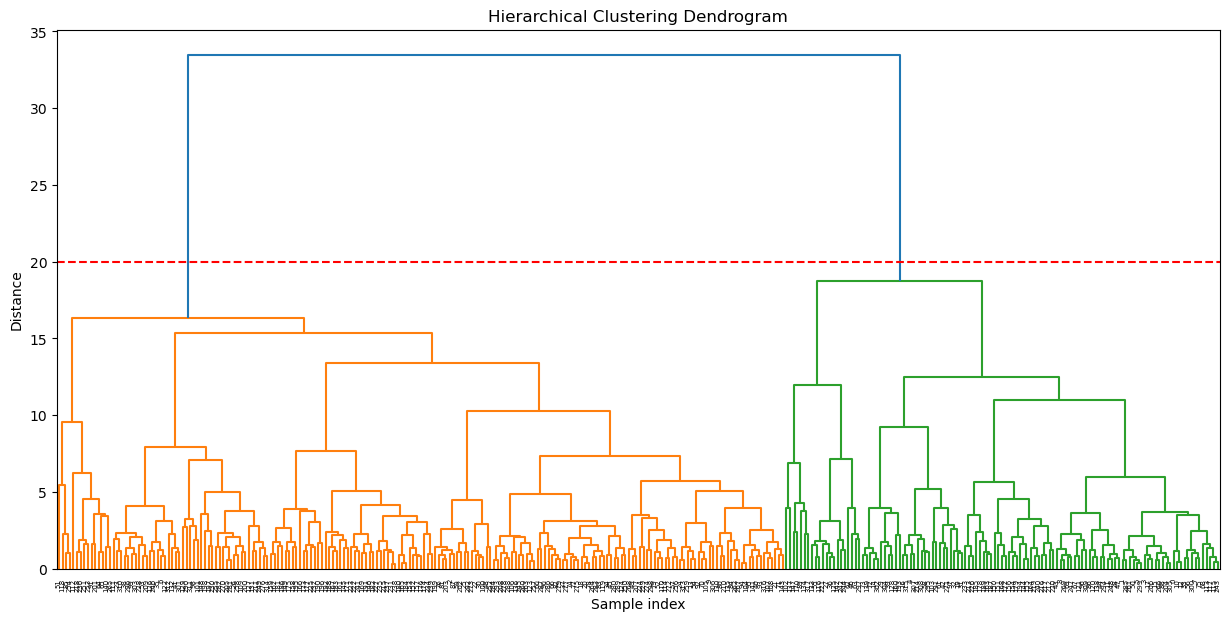

In [65]:
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axhline(y=20, color='r', linestyle='--')
plt.show()


In [66]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering using the default linkage algorithm 'ward' on X (the full features)
h_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') # Use the default linkage algorithm 'ward'
h_cluster.fit(wholesale_data[num_columns.columns])



AgglomerativeClustering(affinity='euclidean')

In [67]:
labels = h_cluster.fit_predict(wholesale_data[num_columns.columns])
labels

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,

In [68]:
wholesale_data['Cluster_h'] = labels
wholesale_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Cluster_h
0,2,3,0.603895,1.312173,0.693679,-1.472448,0.831770,0.646546,0,0
1,2,3,0.167258,1.328450,0.923210,0.413466,0.960274,0.890810,0,0
3,1,3,0.638200,-0.835795,0.125369,1.569735,-0.193793,0.896619,1,1
5,2,3,0.382217,1.151417,0.314743,-0.457712,0.585824,0.716475,0,0
6,2,3,0.571205,0.175845,0.615028,-0.750729,0.930912,-0.127716,0,1
7,2,3,0.220507,0.626093,0.908631,0.364893,0.965500,1.208272,0,0
8,1,3,0.041567,0.310927,0.498938,-0.859564,0.558053,0.147432,0,1
9,2,3,0.046929,1.454888,1.585961,0.038282,1.462112,1.034548,0,0
10,2,3,-0.385102,0.714918,1.220121,1.233405,1.328207,0.875125,0,0
11,2,3,0.631475,-0.899616,0.192736,0.220176,-0.144753,-0.207139,1,1


In [69]:
# Calculating the Silhouette Score
score2 = silhouette_score(wholesale_data, labels)
print('Silhouette Score: %.3f' % score2)

Silhouette Score: 0.291


# Principal Component Analysis

In [70]:

# Dropping the cluster labels we added to X in the K-means and Hierachical Clustering parts
X = wholesale_data.drop(columns=['Cluster', 'Cluster_h'])

Eigenvalues:
[2.70461043 1.5389519  0.71842914 0.63314962 0.566117   0.33613355
 0.21918714 0.09448405]

Variances (Percentage):
[39.70908059 22.5948862  10.54797401  9.29590049  8.31172781  4.93511156
  3.21810487  1.38721447]



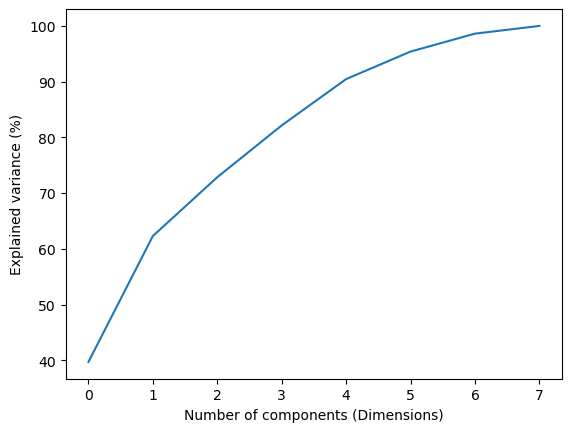

In [71]:
# Applying PCA on X - the full features data set
pca = PCA(n_components=None)
pca.fit(X)

# eigenvalues
print('Eigenvalues:')
print(pca.explained_variance_)
print()

# variances
print('Variances (Percentage):')
print(pca.explained_variance_ratio_ * 100)
print()

# plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components (Dimensions)')
plt.ylabel('Explained variance (%)')
plt.show()

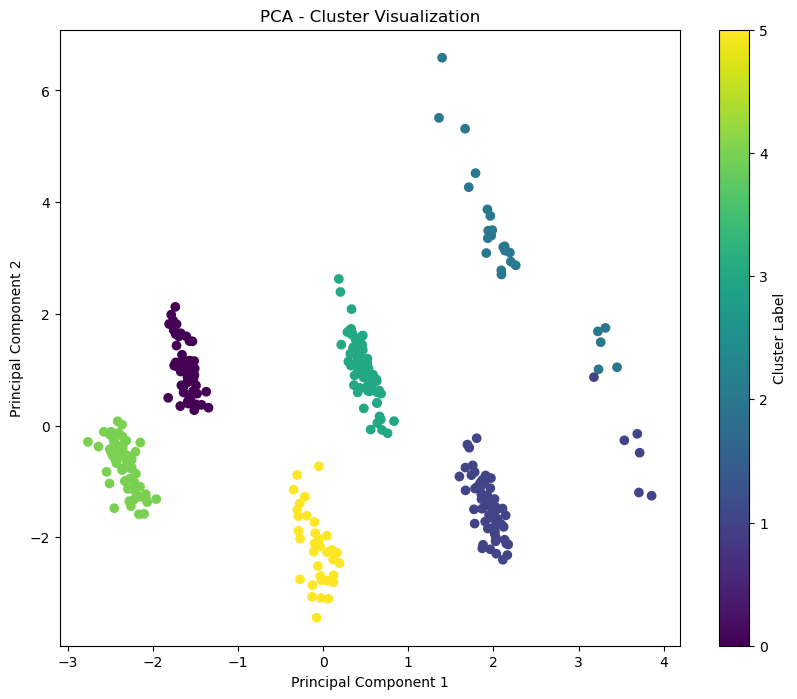

In [76]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Performing clustering on the PCA-reduced data
# using K-means with an arbitrary choice of 3 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_pca_2d)

# Create a scatter plot of the PCA-reduced data
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=X['Cluster'], cmap='viridis', marker='o')
plt.title('PCA - Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [77]:
# Calculating the Silhouette Score
silhouette_avg = silhouette_score(X_pca_2d, X['Cluster'])

print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.661590951593684


# Conclusion

The silhouette scores for both hierarchical clustering (0.291) and K-means (0.286) are quite close, indicating that both algorithms chosen are performing similarly in terms of cluster cohesion and separation.
Neither score is particularly high, which suggests that there may not be very distinct clusters within my data, or that both algorithms are struggling to find a clear structure given the number of clusters specified.
Each row in the wholesale dataframe appears to have been assigned to a cluster by each method. Both clusters have identified similar patterns however, there are rows where the two methods disagree.
I then performed PCA using no components and plotted a graph showing the cumulative variance as a function of PCA. When using PCA for dimensionality reduction before clustering, this graph helped determine how many dimensions to retain to capture most of the information in the data. The graph plateaus around 6 and so I used 6 number of clusters. the silhouette score went up to 0.66, a clear improvement from 0.29. 
The cluster visualization is helpful in deciphering how well the clusters formed by a clustering algorithm (like K-means or hierarchical clustering) are separated in the reduced space of the principal components. The colours represent different clusters. Ideally, we would want to see well-defined, non-overlapping clusters that indicate the algorithm has found distinct groups in the data. Some clusters seem to be well-separated while others are closer together, which might indicate some degree of similarity between those clusters. 